# Modelling - PART 2
### Create Basic Linear Regression Models 
Read model_data.csv<br>
Model 1 - Make Minimum Viable Product<br>
Model 2 - Run LR on all features<br>
Model 3 - Identify not significant features and run model with only significant features<br>
Model 4 - Try feature engineering with mileage, curb_weight, hp features

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
%pylab inline 
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'svg'
sns.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

### 1. Read data and setup data for modelling

In [4]:
df_model = pd.read_csv('../data/model_data.csv')
df_model = df_model.drop(columns="Unnamed: 0")

# transform target -- log transg=formation
df_model['price']=df_model['price'].apply(np.log) # do the log transformation based on our exploration outcomes
df_model.head()

,price,year,mileage,drive_type,engine_size,num_cylinders,hp,comp_ratio,bore,stroke,values_per_cylinder,wheel_base,length,width,height,curb_weight,leg_room,head_room,seating_cap,cargo_cap,city_mpg,hw_mpg,luxury,black_interior,dark_exterior,light_exterior,prime_exterior,normal_engine,turbo_engine,alternate_engine
0,9.903388,2016,31000,2,2.4,4,201,12.0,3.43,3.90,4.0,105.1,181.9,70.0,55.0,2970,42.3,38.0,5,12.0,25,35,1,1,1,0,0,1,0,0
1,10.203518,2013,48000,4,3.0,6,272,10.0,3.33,3.50,0.0,110.5,182.6,74.0,65.0,4345,41.0,38.1,5,57.0,18,26,1,1,1,0,0,0,1,0
2,10.645377,2013,37000,4,4.2,8,450,13.0,3.33,3.65,0.0,108.3,183.0,73.0,53.0,3924,41.3,39.1,4,12.0,16,23,1,1,0,1,0,1,0,0
3,10.043163,2011,41000,4,2.0,4,265,9.8,3.25,3.65,4.0,97.2,165.3,72.0,53.0,3241,41.1,37.7,4,13.0,21,29,1,1,0,0,1,0,1,0
4,9.952182,2015,14000,4,2.0,4,180,11.0,3.31,3.55,4.0,110.6,182.1,71.0,56.0,3450,42.0,40.3,5,17.0,23,35,1,0,0,0,1,0,1,0


### Model 1 - Basic Linear Regression - MVP
A good start we can improve on this
Only numeric variables as set out

In [4]:
# fitting with only numeric variables (old version used for MVP)
y, X = patsy.dmatrices('price ~ mileage + engine_size + hp + bore + \
stroke + wheel_base + length + width + height + curb_weight + leg_room + \
head_room + seating_cap + cargo_cap + city_mpg + hw_mpg + year + drive_type + \
num_cylinders + values_per_cylinder', data=df_model, return_type="dataframe")

# Create your model
model = sm.OLS(y,X)
# Fit your model to your training set
fit = model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     411.7
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:45:37   Log-Likelihood:                 740.02
No. Observations:                1526   AIC:                            -1438.
Df Residuals:                    1505   BIC:                            -1326.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -41.0755      5.734     -7.163      0.000     -52.323     -29.828
mileage             -4.502e-06   2.38e-07    -18.942      0.000   -4.97e-06   -4.04e-06
engine_size            -0.0295      0.015     -2.029      0.043      -0.058      -0.001
hp                      0.0026      0.000     16.166      0.000       0.002       0.003
bore                   -0.0894      0.018     -5.098      0.000      -0.124      -0.055
stroke                  0.0764      0.016      4.826      0.000       0.045       0.108
wheel_base             -0.0005      0.002     -0.267      0.789      -0.004       0.003
length                  0.0002      0.001      0.190      0.850      -0.002       0.002
width                  -0.0026      0.002     -1.093      0.274      -0.007       0.002
height                  0.0025      0.002      1.180      0.238      -0.002       0.007
curb_weight             0.0002   2.01e-05     10.357      0.000       0.000       0.000
leg_room               -0.0062      0.004     -1.747      0.081      -0.013       0.001
head_room              -0.0175      0.005     -3.877      0.000      -0.026      -0.009
seating_cap            -0.0280      0.007     -3.809      0.000      -0.042      -0.014
cargo_cap               0.0002      0.000      0.575      0.565      -0.001       0.001
city_mpg                0.0074      0.001      5.019      0.000       0.005       0.010
hw_mpg                 -0.0004      0.002     -0.188      0.851      -0.005       0.004
year                    0.0252      0.003      8.745      0.000       0.020       0.031
drive_type              0.0911      0.006     15.906      0.000       0.080       0.102
num_cylinders           0.0089      0.011      0.778      0.437      -0.014       0.031
values_per_cylinder    -0.0220      0.008     -2.876      0.004      -0.037      -0.007
==============================================================================
Omnibus:                       28.089   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.358
Skew:                           0.250   Prob(JB):                     3.46e-08
Kurtosis:                       3.539   Cond. No.                     6.76e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model 2 - Basic Linear Regression - Every Feature
all features including hot encoded features

In [5]:
# fitting everything like a maniac - kitchen sink

y, X = patsy.dmatrices('price ~ year + mileage + drive_type + engine_size +\
       num_cylinders + hp + comp_ratio + bore + stroke + \
       values_per_cylinder + wheel_base + length + width + height + \
       curb_weight + leg_room + head_room + seating_cap + cargo_cap + \
       city_mpg + hw_mpg + luxury + black_interior + dark_exterior + \
       light_exterior + prime_exterior + normal_engine + turbo_engine + alternate_engine', data=df_model, return_type="dataframe")

# Create your model
model2 = sm.OLS(y,X)
# Fit your model to your training set
fit2 = model2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     335.0
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:45:37   Log-Likelihood:                 828.39
No. Observations:                1526   AIC:                            -1599.
Df Residuals:                    1497   BIC:                            -1444.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -35.8242      4.166     -8.600      0.000     -43.996     -27.653
year                    0.0280      0.003     10.050      0.000       0.023       0.033
mileage             -4.371e-06   2.26e-07    -19.303      0.000   -4.82e-06   -3.93e-06
drive_type              0.0787      0.006     14.140      0.000       0.068       0.090
engine_size             0.0486      0.018      2.762      0.006       0.014       0.083
num_cylinders          -0.0072      0.011     -0.658      0.511      -0.029       0.014
hp                      0.0017      0.000      9.228      0.000       0.001       0.002
comp_ratio              0.0239      0.005      5.206      0.000       0.015       0.033
bore                   -0.0518      0.017     -2.975      0.003      -0.086      -0.018
stroke                  0.0370      0.016      2.372      0.018       0.006       0.068
values_per_cylinder    -0.0243      0.008     -3.226      0.001      -0.039      -0.010
wheel_base             -0.0016      0.002     -0.930      0.353      -0.005       0.002
length                  0.0012      0.001      1.357      0.175      -0.001       0.003
width                  -0.0008      0.002     -0.366      0.714      -0.005       0.004
height                  0.0054      0.002      2.596      0.010       0.001       0.010
curb_weight             0.0002   2.05e-05      8.293      0.000       0.000       0.000
leg_room               -0.0015      0.003     -0.437      0.662      -0.008       0.005
head_room              -0.0130      0.004     -3.018      0.003      -0.021      -0.005
seating_cap            -0.0343      0.007     -4.885      0.000      -0.048      -0.021
cargo_cap               0.0001      0.000      0.318      0.751      -0.001       0.001
city_mpg                0.0116      0.002      7.180      0.000       0.008       0.015
hw_mpg                 -0.0049      0.002     -2.251      0.025      -0.009      -0.001
luxury                  0.1062      0.011      9.495      0.000       0.084       0.128
black_interior         -0.0004      0.008     -0.049      0.961      -0.017       0.016
dark_exterior         -11.9392      1.388     -8.599      0.000     -14.663      -9.216
light_exterior        -11.9400      1.389     -8.595      0.000     -14.665      -9.215
prime_exterior        -11.9450      1.388     -8.604      0.000     -14.668      -9.222
normal_engine           0.2932      0.143      2.057      0.040       0.014       0.573
turbo_engine            0.3789      0.143      2.646      0.008       0.098       0.660
alternate_engine        0.2399      0.143      1.677      0.094      -0.041       0.520
==============================================================================
Omnibus:                       28.851   Durbin-Watson:                   1.453
Prob(Omnibus):       

 P > 0.05 - num_cylinders, stroke, wheel_base + length + width + height leg_room, cargo_cap,  black_interior <br>
 I again redid the model removing above and <br>
 round 2 P >0.05 - bore, values_per_cylinder

### Model 3 - Basic Linear Regression - Remove features with high P values
This is the best Linear Regression Model we have built so far..

In [6]:
#remove - p>0.05 - num_cylinders, stroke, wheel_base + length + width + height leg_room, cargo_cap,  black_interior
# round tw0 - bore, values_per_cylinder
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('price ~ year + mileage + drive_type + engine_size +\
       hp + comp_ratio + \
       curb_weight + head_room + seating_cap  + \
       city_mpg + hw_mpg + luxury  + dark_exterior + \
       light_exterior + prime_exterior + normal_engine + turbo_engine + alternate_engine', data=df_model, return_type="dataframe")

# Create your model
model3 = sm.OLS(y,X)
# Fit your model to your training set
fit3 = model3.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     593.3
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:45:37   Log-Likelihood:                 885.14
No. Observations:                1774   AIC:                            -1734.
Df Residuals:                    1756   BIC:                            -1636.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -37.7330      3.659    -10.313      0.000     -44.909     -30.557
year                 0.0294      0.002     12.120      0.000       0.025       0.034
mileage          -4.286e-06   2.06e-07    -20.782      0.000   -4.69e-06   -3.88e-06
drive_type           0.0736      0.005     14.715      0.000       0.064       0.083
engine_size          0.0572      0.011      5.437      0.000       0.037       0.078
hp                   0.0011      0.000      8.824      0.000       0.001       0.001
comp_ratio           0.0228      0.004      5.401      0.000       0.015       0.031
curb_weight          0.0002   1.22e-05     13.339      0.000       0.000       0.000
head_room           -0.0172      0.003     -5.025      0.000      -0.024      -0.010
seating_cap         -0.0092      0.005     -1.909      0.056      -0.019       0.000
city_mpg             0.0146      0.001     10.176      0.000       0.012       0.017
hw_mpg              -0.0119      0.002     -6.969      0.000      -0.015      -0.009
luxury               0.1050      0.010     10.392      0.000       0.085       0.125
dark_exterior      -12.5741      1.220    -10.311      0.000     -14.966     -10.182
light_exterior     -12.5777      1.220    -10.310      0.000     -14.970     -10.185
prime_exterior     -12.5812      1.219    -10.318      0.000     -14.973     -10.190
normal_engine        0.3354      0.148      2.267      0.024       0.045       0.626
turbo_engine         0.4423      0.148      2.982      0.003       0.151       0.733
alternate_engine     0.2724      0.148      1.834      0.067      -0.019       0.564
==============================================================================
Omnibus:                       27.162   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.850
Skew:                           0.195   Prob(JB):                     1.64e-08
Kurtosis:                       3.577   Cond. No.                     3.55e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.25e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5,1,'Residues')

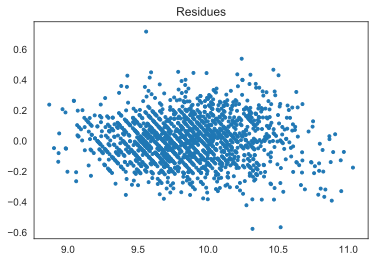

In [7]:
# residues 
plt.plot(fit3.fittedvalues, fit3.resid,'.');
plt.title("Residues")

Text(0,0.5,'predicted y')

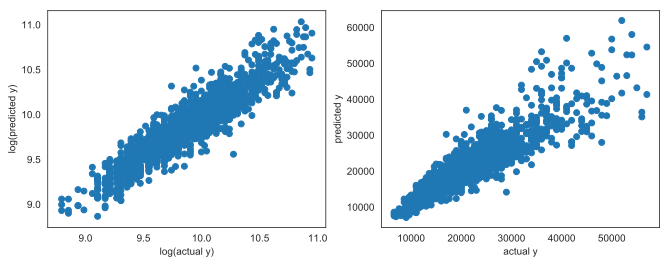

In [8]:
fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.scatter(y,fit3.fittedvalues);
ax2.scatter(y.apply(np.exp),fit3.fittedvalues.apply(np.exp));
ax1.set_xlabel("log(actual y)")
ax1.set_ylabel("log(predicted y)")
ax2.set_xlabel("actual y")
ax2.set_ylabel("predicted y")

In [9]:
print("Adjusted R^2 = ", fit3.rsquared_adj)

Adjusted R^2 =  0.8502712268793351


### Model 4 - Feature Engineering
Modifying the features make it worse !!!

In [10]:
fe_model = df_model
fe_model['mileage']=1/fe_model['mileage']
fe_model['ratio'] = fe_model['hp']/fe_model['curb_weight']
fe_model.drop(columns=['hp','curb_weight'])
yf, Xf = patsy.dmatrices('price ~ year + mileage + drive_type + engine_size +\
        comp_ratio + \
       ratio + head_room + seating_cap + \
       city_mpg + hw_mpg + luxury  + dark_exterior + \
        turbo_engine + light_exterior + prime_exterior + normal_engine + alternate_engine', data=fe_model, return_type="dataframe")
# Create your model
model4 = sm.OLS(yf,Xf)
# Fit your model to your training set
fit4 = model4.fit()
# Print summary statistics of the model's performance
fit4.summary()

# light_exterior + prime_exterior + normal_engine +

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     447.3
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        22:45:39   Log-Likelihood:                 632.81
No. Observations:                1774   AIC:                            -1232.
Df Residuals:                    1757   BIC:                            -1138.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -89.6574      3.081    -29.100      0.000     -95.700     -83.615
year                 0.0640      0.002     31.212      0.000       0.060       0.068
mileage            637.9641     76.022      8.392      0.000     488.861     787.067
drive_type           0.0881      0.006     15.423      0.000       0.077       0.099
engine_size          0.1805      0.008     22.229      0.000       0.165       0.196
comp_ratio           0.0283      0.005      5.829      0.000       0.019       0.038
ratio                1.1078      0.489      2.264      0.024       0.148       2.067
head_room           -0.0202      0.004     -5.101      0.000      -0.028      -0.012
seating_cap          0.0138      0.005      2.648      0.008       0.004       0.024
city_mpg             0.0178      0.002     10.658      0.000       0.014       0.021
hw_mpg              -0.0217      0.002    -11.548      0.000      -0.025      -0.018
luxury               0.1382      0.011     12.064      0.000       0.116       0.161
dark_exterior      -29.8756      1.027    -29.086      0.000     -31.890     -27.861
turbo_engine         0.5674      0.171      3.322      0.001       0.232       0.902
light_exterior     -29.8917      1.027    -29.097      0.000     -31.907     -27.877
prime_exterior     -29.8901      1.027    -29.115      0.000     -31.904     -27.877
normal_engine        0.3300      0.170      1.936      0.053      -0.004       0.664
alternate_engine     0.3463      0.171      2.024      0.043       0.011       0.682
==============================================================================
Omnibus:                        5.508   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                6.568
Skew:                           0.019   Prob(JB):                       0.0375
Kurtosis:                       3.296   Cond. No.                     2.81e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""